In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import PIL
import matplotlib
import matplotlib.pyplot as plt
%matplotlib qt
import seaborn as sns

from evaluation.vlc import VLC
from utils.path_utils import Files
from evaluation.simulator import TimingConfig

In [2]:

directory = "/Users/guycohen/Downloads/eval/micro"
files = Files(directory, extension='png', sorting_key=lambda f: int(f.split('_')[-1].split('.')[0]))
timing_config = TimingConfig.load_json("/Users/guycohen/Downloads/eval/time_config.json")
log_path = "/Users/guycohen/Downloads/eval/bboxes.csv"



In [ ]:
# vlc = VLC(files, timing_config, log_path, 'mic')
# vlc.mainloop()

In [3]:
from evaluation.analysis import Plotter

pltr = Plotter(log_path)

In [4]:
data = pltr.print_statistics()

##################### No Preds #####################
Num of No Preds: 3
No prediction in frames: [21997, 22004, 61199]
corresponding cycle steps: [7, 14, 14]
##################### Cycles #####################
Num of cycles: 4080
##################### Area Diff #####################
Non Perfect Predictions: 0.288%
##################### General #####################


,frame,cycle,plt_x,plt_y,cam_x,cam_y,cam_w,cam_h,mic_x,mic_y,...,wrm_y,wrm_w,wrm_h,wrm_center_x,wrm_center_y,mic_center_x,mic_center_y,wrm_speed,bbox_area_diff,bbox_edge_diff
count,61182.000000,61182.000000,61182.000000,61182.000000,61182.000000,61182.000000,61182.0,61182.0,61182.000000,61182.000000,...,61182.000000,61182.000000,61182.000000,61182.000000,61182.000000,61182.000000,61182.000000,61182.000000,6.118200e+04,61182.000000
mean,30606.781325,2039.985437,1266.046255,1121.179040,1266.046255,1121.179040,360.0,360.0,1436.046255,1291.179040,...,1294.509149,12.050882,13.216355,1446.090249,1301.117326,1446.046255,1301.179040,0.292149,3.478966e-02,0.522917
std,17662.663921,1177.510902,192.785161,215.135676,192.785161,215.135676,0.0,0.0,192.785161,215.135676,...,215.319167,3.071914,3.212946,192.808859,215.153416,192.785161,215.135676,0.236847,8.718000e-02,1.251451
min,15.000000,1.000000,885.000000,541.000000,885.000000,541.000000,360.0,360.0,1055.000000,711.000000,...,712.498398,5.599228,5.907318,1063.626976,720.871139,1065.000000,721.000000,0.000903,-2.349879e-14,0.000000
25%,15310.250000,1020.000000,1149.000000,1029.000000,1149.000000,1029.000000,360.0,360.0,1319.000000,1199.000000,...,1200.018482,9.541931,10.766243,1329.225451,1207.887367,1329.000000,1209.000000,0.135177,-3.354505e-15,0.000000
50%,30607.500000,2040.000000,1168.000000,1180.000000,1168.000000,1180.000000,360.0,360.0,1338.000000,1350.000000,...,1351.891373,11.856727,14.264656,1348.435383,1359.523685,1348.000000,1360.000000,0.233943,4.680537e-15,0.000000
75%,45902.750000,3060.000000,1490.000000,1260.000000,1490.000000,1260.000000,360.0,360.0,1660.000000,1430.000000,...,1434.789707,14.520523,15.803734,1669.568335,1440.430336,1670.000000,1440.000000,0.384962,1.668074e-02,0.260082
max,61198.000000,4079.000000,1549.000000,1390.000000,1549.000000,1390.000000,360.0,360.0,1719.000000,1560.000000,...,1560.643234,19.665741,19.883560,1729.797531,1569.973503,1729.000000,1570.000000,8.566980,1.000000e+00,16.423416


In [5]:
data.columns

Index(['frame', 'cycle', 'phase', 'plt_x', 'plt_y', 'cam_x', 'cam_y', 'cam_w',
       'cam_h', 'mic_x', 'mic_y', 'mic_w', 'mic_h', 'wrm_x', 'wrm_y', 'wrm_w',
       'wrm_h', 'wrm_center_x', 'wrm_center_y', 'mic_center_x', 'mic_center_y',
       'wrm_speed', 'bbox_area_diff', 'bbox_edge_diff'],
      dtype='object')

/Users/guycohen/opt/anaconda3/envs/bio-proj/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/guycohen/opt/anaconda3/envs/bio-proj/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/guycohen/opt/anaconda3/envs/bio-proj/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/guycohen/opt/anaconda3/envs/bio-proj/lib/python3.12/site-p

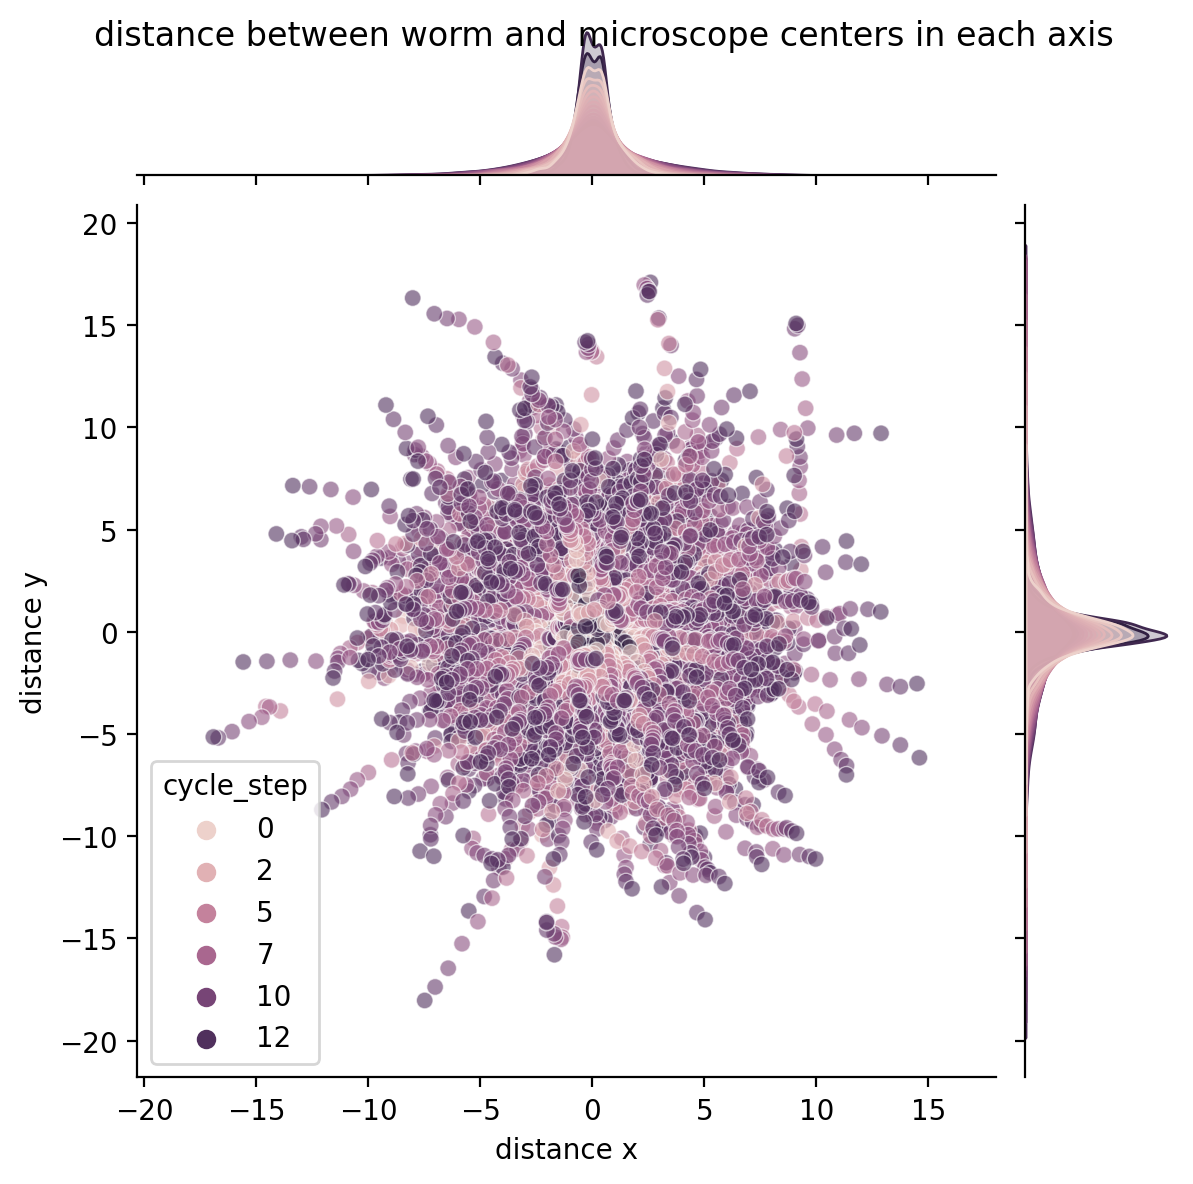

In [8]:
def cond(df: pd.DataFrame, threshold: float=1.5) -> pd.DataFrame:
    mask1 = (df['cycle_step'] == 14) & (df['worm_center_dist'] > threshold)
    cycles = df[mask1]['cycle'].unique()
    return df['cycle'].isin(cycles)

pltr.plot_2d_deviation(hue='cycle_step')

/Users/guycohen/opt/anaconda3/envs/bio-proj/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/guycohen/opt/anaconda3/envs/bio-proj/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/guycohen/opt/anaconda3/envs/bio-proj/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/guycohen/opt/anaconda3/envs/bio-proj/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning

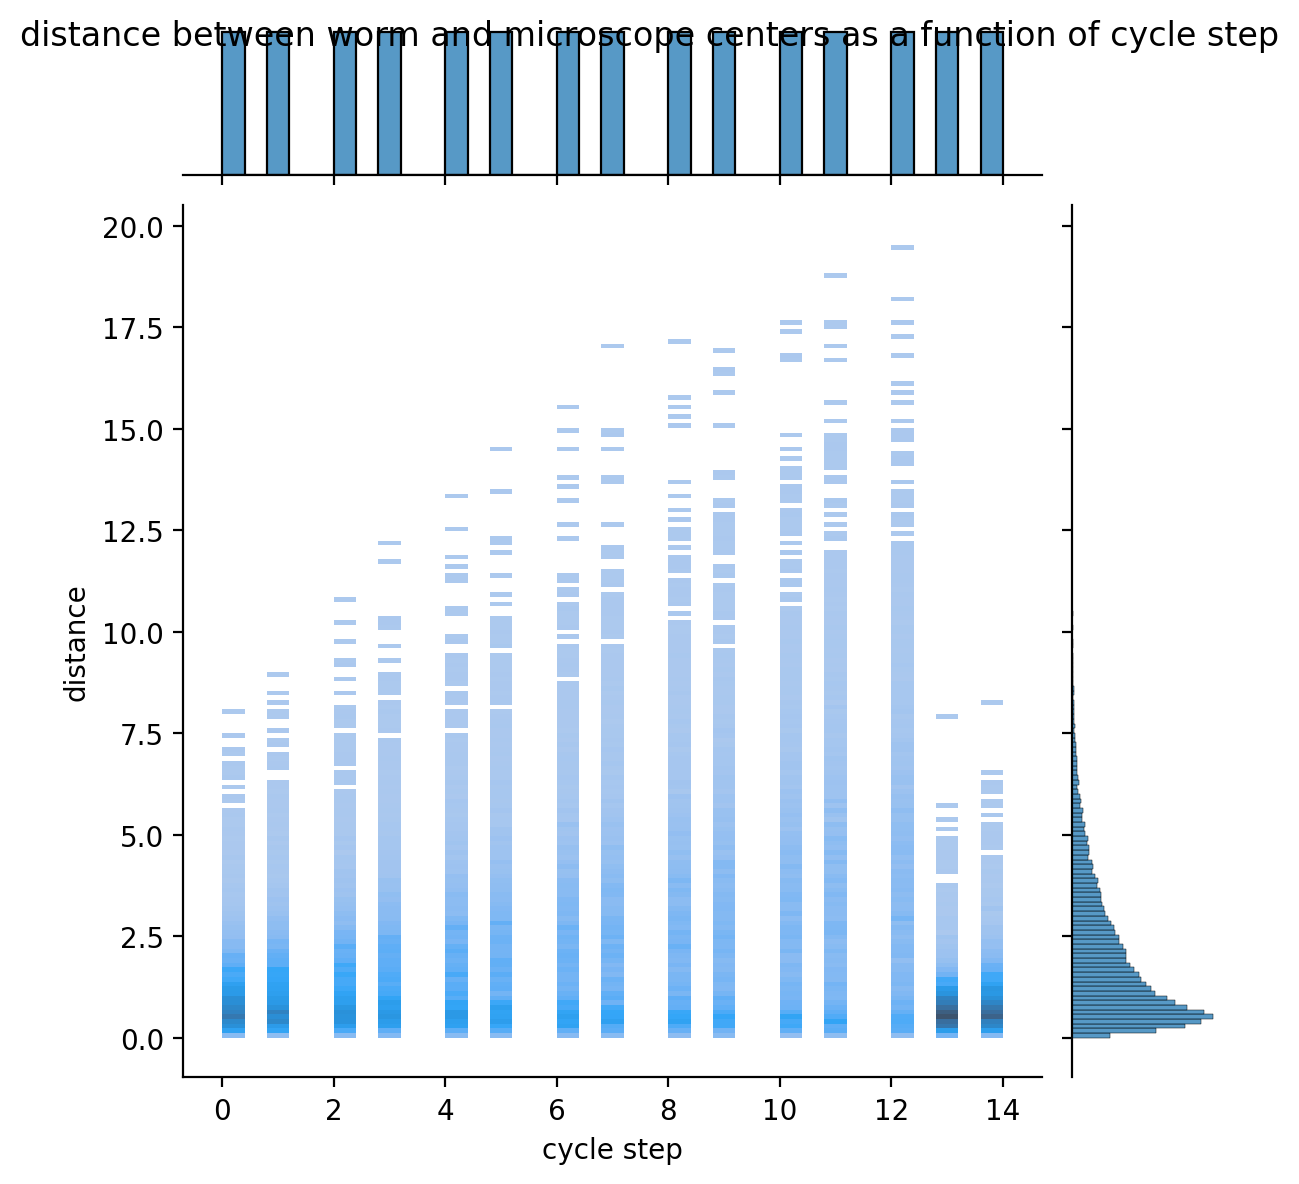

In [9]:
pltr.plot_deviation()

In [ ]:
pltr.plot_area_vs_speed_guy(n=3, window_size=10, hue='phase')

In [ ]:

fig, ax = plt.subplots()
sns.scatterplot(data=data, x='wrm_center_x', y='wrm_center_y', hue='frame', size='marker_size', ax=ax, alpha=0.3, linewidth=0.2)
ax.set_xlim(0)
ax.set_ylim(0)
ax.invert_yaxis()
fig.tight_layout()
plt.show()


In [ ]:
data['wrm_speed_avg'] = pltr.rolling_average(data, window_size=15, column='wrm_speed')

In [ ]:
data['marker_size'] = 0.1 + (data['bbox_area_diff'])*2

In [ ]:
data['marker_size'].describe()

In [ ]:
mask = pltr._data['wrm_w'] < 0
pltr._data.loc[mask, 'wrm_w'] = 0

mask = pltr._data['wrm_h'] < 0
pltr._data.loc[mask, 'wrm_h'] = 0

pltr._data['wrm_area'] = pltr._data['wrm_w'] * pltr._data['wrm_h']

In [ ]:
pltr._data['wrm_area'].describe()

In [ ]:
pltr._data[["wrm_w", "wrm_h", 'bbox_area_diff']].describe()

In [ ]:
(data['wrm_speed_avg'] > 2).sum()

In [ ]:
(data['bbox_area_diff'] > 0.2).sum()/len(data.index)

In [ ]:
pltr.remove_invalid_cycles(data)[["wrm_x", "wrm_y", "wrm_w", "wrm_h"]].describe()

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=pltr._data, x='frame', y='wrm_speed_avg', hue='bbox_area_diff', ax=ax, s=8, linewidth=0.1)
ax.set_ylim(0, 2)

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=pltr._data, x='wrm_speed_avg', y='bbox_area_diff', hue='wrm_area', ax=ax, s=8, linewidth=0.1)
ax.set_xlim(0, 2)

In [ ]:
data['residual'] = np.sqrt((data['wrm_center_x'] - data['mic_center_x'])**2 + (data['wrm_center_y'] - data['mic_center_y'])**2)

In [ ]:
data['residual'].describe()

In [ ]:
# data['diff_x'] = data['mic_x'].diff()
# data['diff_y'] = data['mic_y'].diff()
# sns.histplot(data=data, x='diff_y')

In [ ]:
data['cycle_step'] = data['frame']%15

In [ ]:
# fig, ax = plt.subplots()
# sns.jointplot(data=data, x='cycle_step', y='residual', ax=ax, s=8, linewidth=0.1)
sns.jointplot(data=data, x='cycle_step', y='wrm_speed', ax=ax, kind='hist')
# sns.histplot(data=data, x='cycle_step', y='residual')

In [ ]:
sns.catplot(data=data, x='cycle_step', y='wrm_speed', kind='violin')

In [ ]:
%matplotlib inline
for i in [1,2,4,8,15]:
    data = pltr.data_prep_frames(i)
    data['wrm_speed_avg'] = pltr.rolling_average(data, window_size=round(15/i), column='wrm_speed')
    # fig, ax = plt.subplots()
    mask = data['bbox_area_diff'] > 1e-3
    g = sns.jointplot(data=data[mask], x='wrm_speed_avg', y='bbox_area_diff', kind='scatter', xlim=(0, 3), dropna=True)
    g.fig.suptitle(f"i = {i}, rolling window = {round(15/i)}")


In [ ]:
plt._data.dtypes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def calc_bbox_edge_diff(worm_boxes: np.ndarray, mic_boxes: np.ndarray) -> np.ndarray:
    """
    Calculate the length difference between the edges of the worm's bounding boxes and the microscope's bounding boxes.

    Args:
        worm_boxes (numpy.ndarray): Array of (x, y, width, height) tuples for the worm's bounding boxes
        mic_boxes (numpy.ndarray): Array of (x, y, width, height) tuples for the microscope's bounding boxes

    Returns:
        numpy.ndarray: Array of length differences between the edges of the bounding boxes
    """
    worm_left, worm_right = worm_boxes[:, 0], worm_boxes[:, 0] + worm_boxes[:, 2]
    worm_top, worm_bottom = worm_boxes[:, 1], worm_boxes[:, 1] + worm_boxes[:, 3]
    mic_left, mic_right = mic_boxes[:, 0], mic_boxes[:, 0] + mic_boxes[:, 2]
    mic_top, mic_bottom = mic_boxes[:, 1], mic_boxes[:, 1] + mic_boxes[:, 3]

    # Calculate the length difference between the edges of the bounding boxes
    x_diff = np.maximum(0, np.maximum(worm_right - mic_right, mic_left - worm_left))
    y_diff = np.maximum(0, np.maximum(worm_bottom - mic_bottom, mic_top - worm_top))

    return np.maximum(x_diff, y_diff)


def remove_invalid_data(data: pd.DataFrame) -> pd.DataFrame:
    """
    Remove rows with negative bounding box coordinates or dimensions.
    """

    # Check if any row within each cycle has negative values in 'worm' columns
    has_negative = data.groupby('cycle')[['worm_x', 'worm_y', 'worm_w', 'worm_h']].transform('min').lt(0).any(axis=1)

    # Filter the dataframe to keep only cycles without negative values
    filtered_df = data[~has_negative].copy()

    return filtered_df

def add_speed_and_diff(data: pd.DataFrame):
    """
    Add the bounding box edge difference and worm speed to the data.
    """
    # Convert bounding box coordinates and dimensions to NumPy arrays
    worm_boxes = data[["worm_x", "worm_y", "worm_w", "worm_h"]].values
    mic_boxes = data[["mic_x", "mic_y", "mic_w", "mic_h"]].values

    # Calculate bbox edge difference
    data["bbox_edge_diff"] = calc_bbox_edge_diff(worm_boxes, mic_boxes)

    # Calculate worm speed and set it to 0 if frame values are not consecutive
    data["worm_speed"] = np.sqrt(
        (data["worm_x"].shift(-1) - data["worm_x"]) ** 2 + (data["worm_y"].shift(-1) - data["worm_y"]) ** 2
    )
    data.loc[data["frame"].diff().shift(-1) != 1, "worm_speed"] = 0

    return data


def get_cycle_stats(data: pd.DataFrame) -> pd.DataFrame:
    """
    Group the data by cycle and calculate maximum bbox edge difference and average worm speed.
    """
    return (
        data.groupby("cycle")[["bbox_edge_diff", "worm_speed"]]
        .agg({"bbox_edge_diff": "max", "worm_speed": "mean"})
        .reset_index()
    )


def plot_error_vs_speed(cycle_stats: pd.DataFrame):
    """
    Plot the maximum bounding box edge difference versus the average worm speed for each cycle.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(cycle_stats["worm_speed"], cycle_stats["bbox_edge_diff"], s=20, alpha=0.5)
    plt.xlabel("Average Worm Speed", fontsize=14)
    plt.ylabel("Maximum Bounding Box Edge Difference", fontsize=14)
    plt.title("Maximum Bounding Box Edge Difference vs. Average Worm Speed", fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
""" 
# Main execution
data = pd.read_csv('logs/bboxes.csv')
data = remove_invalid_data(data)
data = add_speed_and_diff(data)
cycle_stats = get_cycle_stats(data)
plot_error_vs_speed(cycle_stats)

display(cycle_stats)
"""

In [ ]:
from evaluation.simulator import *
from evaluation.sim_controllers import *

""" time_config = TimingConfig(
    frames_per_sec=60,
    imaging_time_ms=200,
    pred_time_ms=40,
    moving_time_ms=50,
    px_per_mm=90,
    camera_size_mm=(4, 4),
    micro_size_mm=(0.225, 0.225),
    init_position=(0, 2400),
    frame_padding_value=(255, 255, 255),
)

log_config = LogConfig(
    root_folder="logs/",
    save_mic_view=True,
    save_cam_view=True,
)

yolo_config = YoloConfig(model_path="yolov8m-trained.pt") 

time_config.save_json("logs/time_config.json")
log_config.save_json("logs/log_config.json")
yolo_config.save_json("logs/yolo_config.json")
"""

frames_path = "Archive/"
reader = FrameReader.create_from_directory(frames_path)

time_config = TimingConfig.load_json("logs/time_config.json")
log_config = LogConfig.load_json("logs/log_config.json")
yolo_config = YoloConfig.load_json("logs/yolo_config.json")


In [ ]:
print(time_config.imaging_frame_num + time_config.moving_frame_num)

In [ ]:

controller = LoggingController(time_config, yolo_config, log_config)
#controller = YoloController(time_config, yolo_config)
sim = Simulator(time_config, reader, controller)

In [ ]:
sim.run()

In [ ]:
cv.destroyAllWindows()
raise Exception("Finished")

In [ ]:
from frame_reader import FrameReader

reader = FrameReader.create_from_directory("Archive/")

In [ ]:
from dataset.create.box_calculator import BoxCalculator
from dataset.create.sample_extractor import SampleExtractor

bbox_calc = BoxCalculator(reader)
extractor = SampleExtractor(bbox_calc)
extractor.create_all_samples(target_size=(400, 400), save_folder="samples")

In [ ]:
# TODO: IMPROVE
def find_boxes(image: np.ndarray) -> np.ndarray:
    # increase contrast of original image
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # remove gaussian noise
    smoothed = cv.GaussianBlur(image, (3, 3), 0)

    # apply threshold to image to convert it into black & white
    _, mask = cv.threshold(smoothed, 160, 255, cv.THRESH_BINARY_INV)

    # do some morphological magic to clean up noise from the mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

    # dilate to increase all object sizes in the mask
    kernel = np.ones((3, 3), np.uint8)
    mask = cv.dilate(mask, kernel, iterations=5)

    image[mask == 0] = 255
    cv.imshow("masked", image)

    # find contours
    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Populate bounding boxes
    bbox_list = []
    for c in contours:
        area = cv.contourArea(c)

        if area < 500 or area > 4000:
            continue

        box = cv.boundingRect(c)
        bbox_list.append(box)

    # Turn our bboxes into 2d ndarray
    bboxes = np.asanyarray(bbox_list)
    return bboxes